In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Formulate the statement of the interpolation problem with Cubic Spline [mathematical formula]

Given $f(x)$ defined on $[a, b]$, divided into parts $[x_{i-1}, x_i]$, such that $a = x_0 < x_1 <...< x_N = b$. Cubic Spline with defect $3 - p$, called the function $S(x)$, which:
* on each $[x_{i-1}, x_i]$ is polynomial with degree not greater than 3
* has continous first and second derivatives on $[a, b]$
* $S(x_i) = f(x_i)$ on $x_i$
* satisfy border conditions $S''(a) = S''(b) = 0$

### 2. Formulate the functional and differential compatibility conditions [mathematical formula]

* #### Functional compatability condition (p = 0)
$S_m(x_i) - f(x_i) = 0$
* #### Differential compatability condition (p > 0)
$S_m^{(p)}(x_i) - f^{(p)}(x_i) = 0$

### 3. Formulate stitching conditions [mathematical formula]

$S_{m,i-1}^{(p)}(x)|_{x=x_i} = S_{m,i}^{(p)}(x)|_{x=x_i} i=1..n-1$

### 4. Justify why these conditions provide you with the required smoothness [thesis text, no more than 500 characters]

* **Functional compatability condition** guarantee continuity of function
* **Differential compatability condition** guarantee that function is differentiable up to $p$
* **Stitching condition** guarantee continuty of first derivative of function.

### 5. Derive dependency formula: the dependence of the second derivatives at the grid nodes on the increment of the function (the function values difference on the grid nodes). [Mathematical formulas derivation. Detailed, with clear transitions]

1) Let $f_{i,i+1}''(x)=k_{i} \frac{x-x_{i+1}}{x_{i}-x_{i+1}}+k_{i+1} \frac{x-x_{i}}{x_{i+1}-x_{i}}$ 

---
$f_{i, i+1}(x) = \iint f_{i, i+1}''(x) dx^2 =\iint(k_i \frac{x-x_{i+1}}{x_i-x_{i+1}}+k_{i+1} \frac{x-x_i}{x_{i+1}-x_i})dx^2$

$=\int (\frac{k_i}{x_i-x_{i+1}} \frac{(x-x_{i+1})^2}{2}+\frac{k_{i+1}}{x_{i+1}-x_i} \frac{(x-x_i)^2}{2}+C)dx$

$=\frac{k_i}{x_i-x_{i+1}} \frac{(x-x_{i+1})^3}{6}+\frac{k_{i+1}}{x_{i+1}-x_i} \frac{(x-x_i)^3}{6}+Cx+D$

2) Let $C=A-B$ and $D=-Ax_{i+1}+Bx_i$

---
$\Rightarrow$ $f_{i, i+1}(x) =\frac{k_i}{x_i-x_{i+1}} \frac{(x-x_{i+1})^3}{6}+\frac{k_{i+1}}{x_{i+1}-x_i} \frac{(x-x_i)^3}{6}+(A-B)x-Ax_{i+1}+Bx_i$

$\Rightarrow$ $f_{i, i+1}(x) =\frac{k_i}{x_i-x_{i+1}} \frac{(x-x_{i+1})^3}{6}-\frac{k_{i+1}}{x_i-x_{i+1}} \frac{(x-x_i)^3}{6}+A(x-x_{i+1})-B(x-x_i)$

3) Imposing conditions for interpolation for points $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$:

---

* $f_{i,i+1}(x_i)=y_i$ $\Rightarrow$ $\frac{k_i(x_i-x_{i+1})^3}{6(x_i-x_{i+1})} + A(x_i-x_{i+1})=y_i$ $\Rightarrow$ $A=\frac{y_i}{(x_i-x_{i+1})}-\frac{k_i(x_i-x_{i+1})}{6}$

* $f_{i,i+1}(x_{i+1})=y_{i+1}$ $\Rightarrow$ $-\frac{k_{i+1}(x_{i+1}-x_i)^3}{6(x_i-x_{i+1})} - B(x_{i+1}-x_i)=y_{i+1}$ $\Rightarrow$ $B=\frac{y_{i+1}}{(x_i-x_{i+1})}-\frac{k_{i+1}(x_i-x_{i+1})}{6}$

4) Substitute A and B:

---

$f_{i, i+1}(x) =\frac{k_i}{x_i-x_{i+1}} \frac{(x-x_{i+1})^3}{6}-\frac{k_{i+1}}{x_i-x_{i+1}} \frac{(x-x_i)^3}{6}+(\frac{y_i}{(x_i-x_{i+1})}-\frac{k_i(x_i-x_{i+1})}{6})(x-x_{i+1})-(\frac{y_{i+1}}{(x_i-x_{i+1})}-\frac{k_{i+1}(x_i-x_{i+1})}{6})(x-x_i)$

$\Rightarrow$ $f_{i, i+1}(x) =\frac{k_i}{6} (\frac{(x-x_{i+1})^3}{x_i-x_{i+1}} -(x-x_{i+1})(x_i-x_{i+1})) 
-\frac{k_{i+1}}{6} (\frac{(x-x_i)^3}{x_i-x_{i+1}}-(x-x_i)(x_i-x_{i+1}))
+\frac{y_i(x-x_{i+1})-y_{i+1}(x-x_i)}{x_i-x_{i+1}}$

5) Imposing stitching condition $f_{i-1, i}(x_i)=f_{i, i+1}(x_i)$ :

---

* $f_{i,i+1}'(x)=\frac{k_i}{6}[\frac{3(x-x_{i+1})^2}{x_i-x_{i+1}}-(x_i-x_{i+1})]\quad - \frac{k_{i+1}}{6}[\frac{3(x-x_i)^2}{x_i-x_{i+1}}-(x_i-x_{i+1})] +\frac{y_i-y_{i+1}}{x_i-x_{i+1}}$

* $f_{i-1,i}'(x)=\frac{k_{i-1}}{6}[\frac{3(x-x_i)^2}{x_{i-1}-x_i}-(x_{i-1}-x_i)]\quad -\frac{k_i}{6}[\frac{3(x-x_{i-1})^2}{x_{i-1}-x_i}-(x_{i-1}-x_i)] +\frac{y_{i-1}-y_i}{x_{i-1}-x_i}$

6) Finally: 

---

$k_{i-1}(x_{i-1}-x_{i})+2 k_{i}(x_{i-1}-x_{i+1})+k_{i+1}(x_{i}-x_{i+1})=6(\frac{y_{i-1}-y_{i}}{x_{i-1}-x_{i}}-\frac{y_{i}-y_{i+1}}{x_{i}-x_{i-1}})$

### 6. Create a system of equations using this formula [Matrix representation. Mathematical formulas]

$\begin{bmatrix}
h_1 & 2(h_2+h_1) & h_2 & 0 & .. & .. & 0
\\ .. & .. & .. & .. & .. & .. & .. \\
.. & 0 & h_i & 2(h_{i+1}+h_i) & h_{i+1} & 0 & ..
\\ .. & .. & .. & .. & .. & .. & .. \\
0 & .. & .. & 0 & h_{n-1} & 2(h_n+h_{n-1}) & h_n
\end{bmatrix}
\begin{bmatrix}
m_0 \\ m_1 \\ .. \\ m_i \\ .. \\ m_{n-1} \\ m_n
\end{bmatrix}
=
6\begin{bmatrix}
(\frac{\Delta f_1}{h_2}-\frac{\Delta f_0}{h_1}) 
\\ .. \\
(\frac{\Delta f_i}{h_{i+1}}-\frac{\Delta f_{i-1}}{h_i})
\\ .. \\
(\frac{\Delta f_{n-1}}{h_n}-\frac{\Delta f_{n-2}}{h_{n-1}})
\end{bmatrix}$

### 7. Explain what is an unknown variable in this system. whether the system is closed with respect to an unknown variable. What is missing for closure. [Text, no more than 200 characters]

The system has $n - 2$ unknown variables $m_i, i = 1..n-1$ and it is not closed with respect to $m_i, i = 0..n$. For closure of the system we may set that second derivitives at the ends equal to 0, so $m_0 = m_n = 0$.

### 8. Bring this matrix to the appropriate form to use the Tridiagonal matrix algorithm [Mathematical derivation. Use Gauss Elimination]

$\begin{bmatrix}
1 & -P_1 & 0 & 0 & .. & Q_1 \\
0 & 1 & -P_2 & 0 & .. & Q_2 \\
0 & 0 & 1 & -P_3 & .. & Q_3 \\
.. & .. & .. & .. & .. & .. \\
0 & 0 & 0 & 1 & .. & Q_{n-1} 
\end{bmatrix}$

Where

$P_1=\frac{h_2}{-2(h_2+h_1)}$

$Q_1=\frac{6(\frac{\Delta f_1}{h_2}-\frac{\Delta f_0}{h_1})}{2(h_2+h_1)}$

$P_i=\frac{h_{i+1}}{-2(h_{i+1}+h_i)-h_iP_{i-1}}$

$Q_i=\frac{h_iQ_{i-1}-6(\frac{\Delta f_i}{h_{i+1}}-\frac{\Delta f_{i-1}}{h_i})}{-2(h_{i+1}+h_i)-h_iP_{i-1}}$


### 9. Derive formulas of direct pass and reverse pass of Tridiagonal matrix algorithm [Mathematical formals]

Expanded record of tridiagonal matrix is:

$\alpha_ix_{i - 1} - \beta_ix_i + \gamma_ix_{i + 1} = \delta_i, \alpha_1=\gamma_n=0, i=1..n$ (1)

Suppose we have converted a tridiagonal matrix to an upper triangular matrix by gaussian elimination and got matrix from the previous section. Considering that the last row of this matrix is equal to the right side (so $x_{n-1} = Q_{n-1}$) and each row depends on the row below, we get recurrent formula: $x_i = P_ix_{i + 1} + Q_i, i = 1..n-1$ (2). This is the reverse pass formula.

$x_{i - 1} = P_{i - 1}x_i + Q_{i - 1}$ (3)

Putting (3) in (1):

$\alpha_i(P_{i - 1}x_i + Q_{i - 1}) - \beta_ix_i + \gamma_ix_{i + 1} = \delta_i$

$\Rightarrow x_i = \frac{-\gamma_i}{\alpha_iP_{i - 1} - \beta_i}x_{i + 1} + \frac{-\alpha_iQ_{i - 1} + \delta_i}{\alpha_iP_{i - 1} - \beta_i}$

looking at (2), we get:

$P_i = \frac{\gamma_i}{\beta_i - \alpha_iP_{i - 1}}$

$Q_i = \frac{\alpha_iQ_{i - 1} - \delta_i}{\beta_i - \alpha_iP_{i - 1}}$

$P_i$ and $Q_i$ are direct pass formulas.








### 10. Implement code prototype of the future algorithm implementation. Classes/methods (if you use OOP), functions. The final implementation (on language chosen by you) should not differ from the functions declared in the prototype. [Python code]

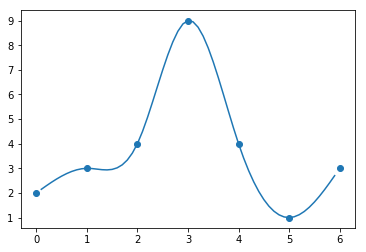

In [22]:
def solve_tdm(A, delta):
    n = len(delta)
    
    P = np.zeros(n - 1)
    Q = np.zeros(n - 1)
    
    P[0] = -A[2][0] / A[1][0]
    Q[0] = delta[0] / A[1][0]
    
    for i in range(1, n - 1):
        P[i] = -A[2][i] / (A[1][i] + A[0][i] * P[i - 1])
        Q[i] = (delta[i] - A[0][i] * Q[i - 1]) / (A[1][i] + A[0][i] * P[i - 1])
        
    x = np.zeros(n)
    x[n - 1] = (delta[n - 1] - A[0][n - 1] * Q[n - 2]) / (A[1][n - 1] + A[0][n - 1] * P[n - 2])
 
    for i in range(n - 2, -1, -1):
        x[i] = x[i + 1] * P[i] + Q[i]
    return x

 
def build_spline(x, f):
    n = len(x)
    
    h = np.zeros(n - 1)
    df = np.zeros(n - 1)
    
    A = np.zeros((3, n - 2))
    delta = np.zeros(n - 2)
    
    for i in range(0, n - 1):
        h[i] = x[i + 1] - x[i]
        df[i] = f[i + 1] - f[i]
 
    for i in range(0, n - 2):
        A[0][i] = h[i]
        A[1][i] = 2 * (h[i] + h[i + 1])
        A[2][i] = h[i + 1]
        delta[i] = 6 * (df[i + 1] / h[i + 1] - df[i] / h[i])

    A[0][0] = 0
    A[2][n - 3] = 0
 
    m = np.pad(solve_tdm(A, delta), (1, 1), 'constant', constant_values=0)
    coef = np.zeros((4, n - 1))
    
    for i in range(0, n - 1):
        coef[0][i] = f[i]
        coef[1][i] = (df[i] / h[i] - h[i] * m[i] / 2 - h[i] * (m[i + 1] - m[i]) / 6)
        coef[2][i] = m[i] / 2
        coef[3][i] = (m[i + 1] - m[i]) / (6 * h[i])
 
    return coef
 
def interpolate(q, coef, xs):
    i, _ = next((i, x) for (i, x) in enumerate(xs) if x >= q)
    i -= 1
    h = q - xs[i]
    return coef[0][i] + coef[1][i] * h + coef[2][i] * h**2 + coef[3][i] * h**3

x = [0, 1, 2, 3, 4, 5, 6]
f = [2, 3, 4, 9, 4, 1, 3]
spline = build_spline(x, f)

steps = np.arange(0.1, 6, 0.1)
y_pred = [interpolate(step, spline, x) for step in steps]

plt.scatter(x, f)
plt.plot(steps, y_pred)
plt.show()

### 11. Derive formula of Cubic Spline method error [Mathematical formulas]

Let the function $y = f(x)$ have a fourth-order continuous derivative on the interval $[a, b]$ and $M_4 = max_{[a, b]}|f^{(4)}(x)|$. 

Then, for $S_3(x)$ that satisfy the boundary conditions, the following error estimate holds: $max_{[a, b]}|f^{(p)}(x) - S_3^{(p)}(x)| ≤ С_pM_4h_{max}^{4 - p}, p=[1,2,3], h_{max} = max_{1 ≤ i ≤ n}h_i$

### 12. Rate the complexity of the algorithm [Text, and rate in terms of big O, no more than 100 characters]

Most complex task is solving tridiagonal matrix $\approx O(N)$


### Congrats!